# FIGURES FOR EURASIP JOURNAL

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dechorate.utils.file_utils import load_from_pickle
from dechorate import constants

## RECORDING SET-UP TOP VIEW

In [2]:
# load local information
positions_note = pd.read_csv('../data/final/dECHORATE_positioning_annotation.csv')
mics = positions_note.loc[positions_note['type'] == 'mic'][['x', 'y', 'z']].values.T
srcs_dir = positions_note.loc[positions_note['type'] == 'directional'][['x', 'y', 'z']].values.T
srcs_omn = positions_note.loc[positions_note['type'] == 'omnidirectional'][['x', 'y', 'z']].values.T
srcs_nse = positions_note.loc[positions_note['type'] == 'babble noise'][['x', 'y', 'z']].values.T
arrs = positions_note.loc[positions_note['type'] == 'array'][['x', 'y', 'z']].values.T

room_size = constants['room_size']

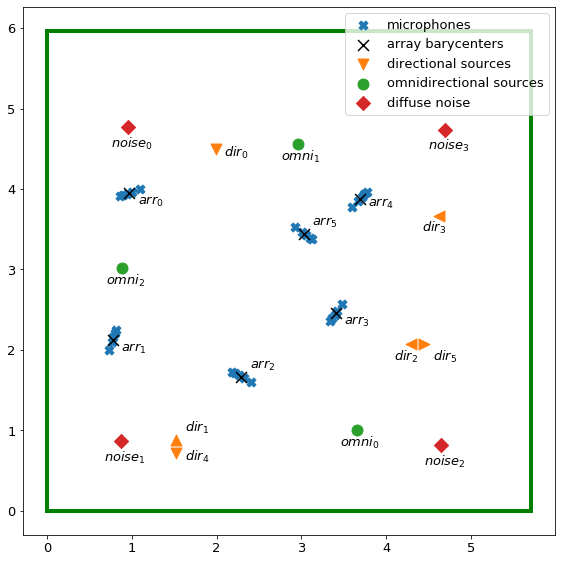

In [3]:
## PRINT FIGURES
# Blueprint 2D xy plane
marker_size = 120
plt.rcParams.update({'font.size': 13})

m = { # marker type
    'arrs' : 'x',
    'mics' : 'X',
    'srcs_dir' : 'v',
    'srcs_omn' : 'o',
    'srcs_nse' : 'D',
}
s = { # marker size
    'arrs' : 120,
    'mics' : 80,
    'srcs_dir' : 120,
    'srcs_omn' : 120,
    'srcs_nse' : 100,
}
c = { # colors
    'arrs' : 'k',
    'mics' : 'C0',
    'srcs_dir' : 'C1',
    'srcs_omn' : 'C2',
    'srcs_nse' : 'C3',
    
}
l = { # labels
    'arrs' : 'array barycenters',
    'mics' : 'microphones',
    'srcs_dir' : 'directional sources',
    'srcs_omn' : 'omnidirectional sources',
    'srcs_nse' : 'diffuse noise',
}

plt.figure(figsize=(8,8))

# Plot ROOM
plt.gca().add_patch(
    plt.Rectangle((0, 0),
                   room_size[0], room_size[1], fill=False,
                   edgecolor='g', linewidth=4)
)

plt.scatter(mics[0, :], mics[1, :], marker=m['mics'], s=s['mics'], c=c['mics'], label=l['mics'])
plt.scatter(arrs[0, :], arrs[1, :], marker=m['arrs'], s=s['arrs'], c=c['arrs'], label=l['arrs'])

plt.text(arrs[0, 0]+0.1, arrs[1, 0]-0.15, '$arr_%d$' %0)
plt.text(arrs[0, 1]+0.1, arrs[1, 1]-0.15, '$arr_%d$' %1)
plt.text(arrs[0, 2]+0.1, arrs[1, 2]+0.10, '$arr_%d$' %2)
plt.text(arrs[0, 3]+0.1, arrs[1, 3]-0.15, '$arr_%d$' %3)
plt.text(arrs[0, 4]+0.1, arrs[1, 4]-0.1, '$arr_%d$' %4)
plt.text(arrs[0, 5]+0.1, arrs[1, 5]+0.1, '$arr_%d$' %5)

# DIR
plt.scatter(srcs_dir[0, 0], srcs_dir[1, 0], marker='v', s=s['srcs_dir'], c=c['srcs_dir'], label=l['srcs_dir'])
plt.text(srcs_dir[0, 0]+0.1, srcs_dir[1, 0]-0.1, r'$dir_%d$' %0)
plt.text(srcs_dir[0, 1]+0.1, srcs_dir[1, 1]+0.1, r'$dir_%d$' %1)
plt.text(srcs_dir[0, 2]-0.2, srcs_dir[1, 2]-0.2, r'$dir_%d$' %2)
plt.text(srcs_dir[0, 3]-0.2, srcs_dir[1, 3]-0.2, r'$dir_%d$' %3)
plt.text(srcs_dir[0, 4]+0.1, srcs_dir[1, 4]-0.1, r'$dir_%d$' %4)
plt.text(srcs_dir[0, 5]+0.1, srcs_dir[1, 5]-0.2, r'$dir_%d$' %5)

# DIR
plt.scatter(srcs_dir[0, 1], srcs_dir[1, 1], marker='^', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 2], srcs_dir[1, 2], marker='<', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 3], srcs_dir[1, 3], marker='<', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 4], srcs_dir[1, 4], marker='v', s=s['srcs_dir'], c=c['srcs_dir'])
plt.scatter(srcs_dir[0, 5], srcs_dir[1, 5], marker='>', s=s['srcs_dir'], c=c['srcs_dir'])

# OMNI
plt.scatter(srcs_omn[0, :], srcs_omn[1, :], marker=m['srcs_omn'], s=s['srcs_omn'], c=c['srcs_omn'], label=l['srcs_omn'])
plt.text(srcs_omn[0, 0]-0.2, srcs_omn[1, 0]-0.2, r'$omni_%d$' %0)
plt.text(srcs_omn[0, 1]-0.2, srcs_omn[1, 1]-0.2, r'$omni_%d$' %1)
plt.text(srcs_omn[0, 2]-0.2, srcs_omn[1, 2]-0.2, r'$omni_%d$' %2)


# NOISE
plt.scatter(srcs_nse[0, :], srcs_nse[1, :], marker=m['srcs_nse'], s=s['srcs_nse'], c=c['srcs_nse'], label=l['srcs_nse'])
plt.text(srcs_nse[0, 0]-0.2, srcs_nse[1, 0]-0.25, r'$noise_%d$' %0)
plt.text(srcs_nse[0, 1]-0.2, srcs_nse[1, 1]-0.25, r'$noise_%d$' %1)
plt.text(srcs_nse[0, 2]-0.2, srcs_nse[1, 2]-0.25, r'$noise_%d$' %2)
plt.text(srcs_nse[0, 3]-0.2, srcs_nse[1, 3]-0.25, r'$noise_%d$' %3)


plt.legend()
plt.tight_layout()
plt.savefig('../deliverables/eurasip/figures/positioning2D_xy.pdf')
plt.show()

## Skyline

In [4]:
# LOAD MEASURED RIRs
mics_srcs_echo_annotation = load_from_pickle('../data/final/mics_srcs_echo_annotation.pkl')
toa_pck = mics_srcs_echo_annotation['toa_pck']
toa_sym = mics_srcs_echo_annotation['toa_sym']
rirs = mics_srcs_echo_annotation['rirs']
print(rirs.shape)
L, I, J = rirs.shape
K = 7

(24000, 30, 4)


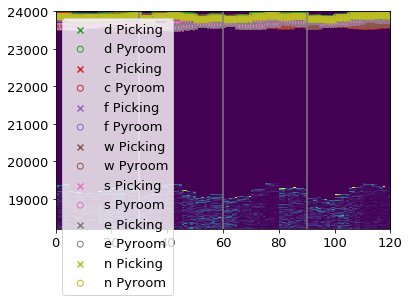

In [5]:
## SKYLINE WITH NEW ESTIMATED IMAGES
rirs_skyline = np.abs(rirs).transpose([0, 2, 1]).reshape([L, I*J])
plt.imshow(rirs_skyline, extent=[0, I*J, 0, L], aspect='auto')

# plot srcs boundaries
for j in range(J):
    plt.axvline(j*I, color='C7')

walls = ['d', 'c', 'f', 'w', 's', 'e', 'n']
Fs = 16000
    
for k in range(K):
    wall = walls[k]
    # plot peak annotation
    plt.scatter(np.arange(I*J)+0.5, L - toa_pck[k, :, :].T.flatten()*Fs, c='C%d' % (k+2), marker='x', label='%s Picking' % wall)
    plt.scatter(np.arange(I*J)+0.5, L - toa_sym[k, :, :].T.flatten()*Fs, marker='o', facecolors='none', edgecolors='C%d' % (k+2), label='%s Pyroom' % wall)

plt.ylim([18200, L])
plt.xlim([0, I*J])
plt.legend()
plt.show()

## Table Dataset

In [6]:
positions_note = pd.read_csv('../data/final/annotation.csv')
positions_note

,Unnamed: 0,filename,src_id,src_ch,src_signal,room_code,room_rfl_floor,room_rfl_ceiling,room_rfl_west,room_rfl_south,...,mic_signal,mic_pos_x_calib,mic_pos_y_calib,mic_pos_z_calib,src_pos_x,src_pos_y,src_pos_z,src_pos_x_calib,src_pos_y_calib,src_pos_z_calib
0,0,2020-01-22__22-48-02,99.0,0.0,silence,10000,0.0,1.0,0.0,0.0,...,silence,0.803161,3.831414,1.043915,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-01-22__22-48-02,99.0,0.0,silence,10000,0.0,1.0,0.0,0.0,...,silence,0.840682,3.845277,1.043915,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-01-22__22-48-02,99.0,0.0,silence,10000,0.0,1.0,0.0,0.0,...,silence,0.887583,3.862606,1.043915,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-01-22__22-48-02,99.0,0.0,silence,10000,0.0,1.0,0.0,0.0,...,silence,0.948555,3.885133,1.043915,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-01-22__22-48-02,99.0,0.0,silence,10000,0.0,1.0,0.0,0.0,...,silence,1.042357,3.919789,1.043915,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907,10907,2020-01-29__17-46-25,9.0,16.0,speech,20002,0.0,2.0,0.0,0.0,...,speech,3.049390,3.444068,1.490480,0.892,3.013,1.403,NaN,NaN,NaN
10908,10908,2020-01-29__17-46-25,9.0,16.0,speech,20002,0.0,2.0,0.0,0.0,...,speech,3.008469,3.472799,1.490480,0.892,3.013,1.403,NaN,NaN,NaN
10909,10909,2020-01-29__17-46-25,9.0,16.0,speech,20002,0.0,2.0,0.0,0.0,...,speech,2.955272,3.510150,1.490480,0.892,3.013,1.403,NaN,NaN,NaN
10910,10910,2020-01-29__17-46-25,9.0,16.0,speech,20002,0.0,2.0,0.0,0.0,...,speech,2.873431,3.567612,1.490480,0.892,3.013,1.403,NaN,NaN,NaN


In [7]:
df = positions_note.loc[(positions_note['src_id']==1)
                 & (positions_note['mic_signal'] == 'speech' )][:6]
df = df.loc[:, ['filename', 'src_id', 'mic_id', 'room_code', 'room_rfl_floor', 'mic_signal', 'src_pos_x', 'src_pos_y', 'src_pos_z', 'mic_pos_x_calib','mic_pos_y_calib','mic_pos_z_calib']]
df

,filename,src_id,mic_id,room_code,room_rfl_floor,mic_signal,src_pos_x,src_pos_y,src_pos_z,mic_pos_x_calib,mic_pos_y_calib,mic_pos_z_calib
217,2020-01-22__22-59-36,1.0,1.0,10000,0.0,speech,1.991,4.498,1.424,0.803161,3.831414,1.043915
218,2020-01-22__22-59-36,1.0,2.0,10000,0.0,speech,1.991,4.498,1.424,0.840682,3.845277,1.043915
219,2020-01-22__22-59-36,1.0,3.0,10000,0.0,speech,1.991,4.498,1.424,0.887583,3.862606,1.043915
220,2020-01-22__22-59-36,1.0,4.0,10000,0.0,speech,1.991,4.498,1.424,0.948555,3.885133,1.043915
221,2020-01-22__22-59-36,1.0,5.0,10000,0.0,speech,1.991,4.498,1.424,1.042357,3.919789,1.043915
222,2020-01-22__22-59-36,1.0,6.0,10000,0.0,speech,1.991,4.498,1.424,0.881363,2.187632,0.986649


In [8]:
print(df.to_latex())

\begin{tabular}{llrrrrlrrrrrr}
\toprule
{} &              filename &  src\_id &  mic\_id &  room\_code &  room\_rfl\_floor & mic\_signal &  src\_pos\_x &  src\_pos\_y &  src\_pos\_z &  mic\_pos\_x\_calib &  mic\_pos\_y\_calib &  mic\_pos\_z\_calib \\
\midrule
217 &  2020-01-22\_\_22-59-36 &     1.0 &     1.0 &      10000 &             0.0 &     speech &      1.991 &      4.498 &      1.424 &         0.803161 &         3.831414 &         1.043915 \\
218 &  2020-01-22\_\_22-59-36 &     1.0 &     2.0 &      10000 &             0.0 &     speech &      1.991 &      4.498 &      1.424 &         0.840682 &         3.845277 &         1.043915 \\
219 &  2020-01-22\_\_22-59-36 &     1.0 &     3.0 &      10000 &             0.0 &     speech &      1.991 &      4.498 &      1.424 &         0.887583 &         3.862606 &         1.043915 \\
220 &  2020-01-22\_\_22-59-36 &     1.0 &     4.0 &      10000 &             0.0 &     speech &      1.991 &      4.498 &      1.424 &         0.948555 &        

## RIR vilualization

In [11]:
rirs = np.load('../data/final/rir_matrix.npy')

In [27]:
Fs = 48000
print(rirs.shape)

(384000, 30, 7, 11)


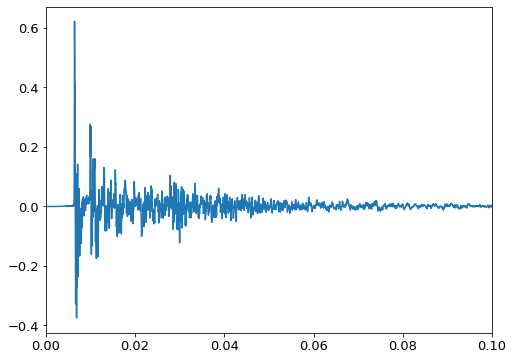

In [102]:
a = 100
rir = -rirs[:,0,0,2]*a
t = np.arange(len(rir))/Fs - 0.09

plt.figure(figsize=[8,6])
plt.plot(t,rir)
plt.xlim([0,0.10])
plt.show()

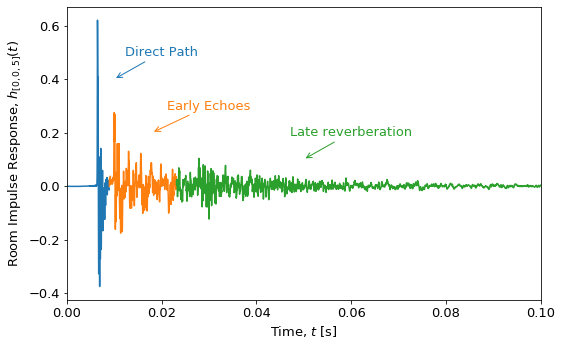

In [103]:
dp = np.argmax(rir)
er = dp + 120
el = dp + 800

rir_dp = rir.copy()
rir_er = rir.copy()
rir_lr = rir.copy()

rir_dp[er:] = np.NaN

rir_er[:er] = np.NaN
rir_er[el:] = np.NaN

rir_lr[:el] = np.NaN


plt.figure(figsize=[8,5])
plt.plot(t,rir_dp)
plt.plot(t,rir_er)
plt.plot(t,rir_lr)
plt.xlim([0,0.10])
plt.xlabel('Time, $t$ [s]')
plt.ylabel('Room Impulse Response, $h_{[0,0,5]}(t)$')

plt.gca().annotate('Direct Path', xy = (0.01, 0.004*a), xytext=(0.02, 0.005*a),
                    va="center", ha="center", color='C0',
                    arrowprops=dict(arrowstyle="->", color='C0')
)

plt.gca().annotate('Early Echoes', xy= (0.018, 0.002*a), xytext=(0.03, 0.003*a),
                    va="center", ha="center", color='C1',
                    arrowprops=dict(arrowstyle="->", color='C1')
)
plt.gca().annotate('Late reverberation', xy= (0.05, 0.001*a), xytext=(0.06, 0.002*a),
                    va="center", ha="center", color='C2',
                    arrowprops=dict(arrowstyle="->", color='C2')
)
plt.tight_layout()
plt.savefig('../deliverables/eurasip/figures/rirs_measured.pdf')
plt.show()


## Data Analysis

### Direct to Early Ratio

In [77]:
# load RIR matrix
rirs = np.load('../data/final/rir_matrix.npy')
rirs = rirs[:, :, :4, :]
# load annotation
mics_srcs_echo_annotation = load_from_pickle('../data/final/mics_srcs_echo_annotation.pkl')
toa_pck = mics_srcs_echo_annotation['toa_pck']
toa_sym = mics_srcs_echo_annotation['toa_sym']
Fs = 48000

In [78]:
print(rirs.shape)
print(toa_pck.shape)

(384000, 30, 4, 11)
(7, 30, 4)


In [79]:
K, I, J = toa_pck.shape
L, I, J, R = rirs.shape

0 000000
( 0, 0)       3.80 	 2.48
( 1, 0)       4.49 	 3.16
( 2, 0)       4.65 	 3.36
( 3, 0)       4.94 	 3.72
( 4, 0)       4.49 	 3.41
( 5, 0)       5.77 	 3.51
( 6, 0)       5.25 	 3.35
( 7, 0)       4.36 	 2.55
( 8, 0)       4.57 	 2.84
( 9, 0)       3.20 	 1.50
(10, 0)       6.70 	 4.24
(11, 0)       6.37 	 4.21
(12, 0)       6.25 	 4.28
(13, 0)       5.41 	 3.37
(14, 0)       5.05 	 3.05
(15, 0)       4.25 	 1.44
(16, 0)       4.52 	 1.71
(17, 0)       4.60 	 1.34
(18, 0)       5.34 	 1.56
(19, 0)       4.66 	 1.02
(20, 0)      -0.37 	 -2.07
(21, 0)      -0.30 	 -2.09
(22, 0)       0.36 	 -1.54
(23, 0)       0.64 	 -1.48
(24, 0)       0.77 	 -1.28
(25, 0)       5.93 	 3.35
(26, 0)       6.11 	 3.29
(27, 0)       6.07 	 3.10
(28, 0)       5.67 	 2.96
(29, 0)       6.64 	 4.22
( 0, 1)       5.22 	 3.24
( 1, 1)       4.81 	 3.12
( 2, 1)       5.43 	 3.73
( 3, 1)       6.68 	 4.09
( 4, 1)       7.74 	 4.72
( 5, 1)       5.96 	 4.86
( 6, 1)       6.36 	 5.30
( 7, 1)       5.70 	 4.7

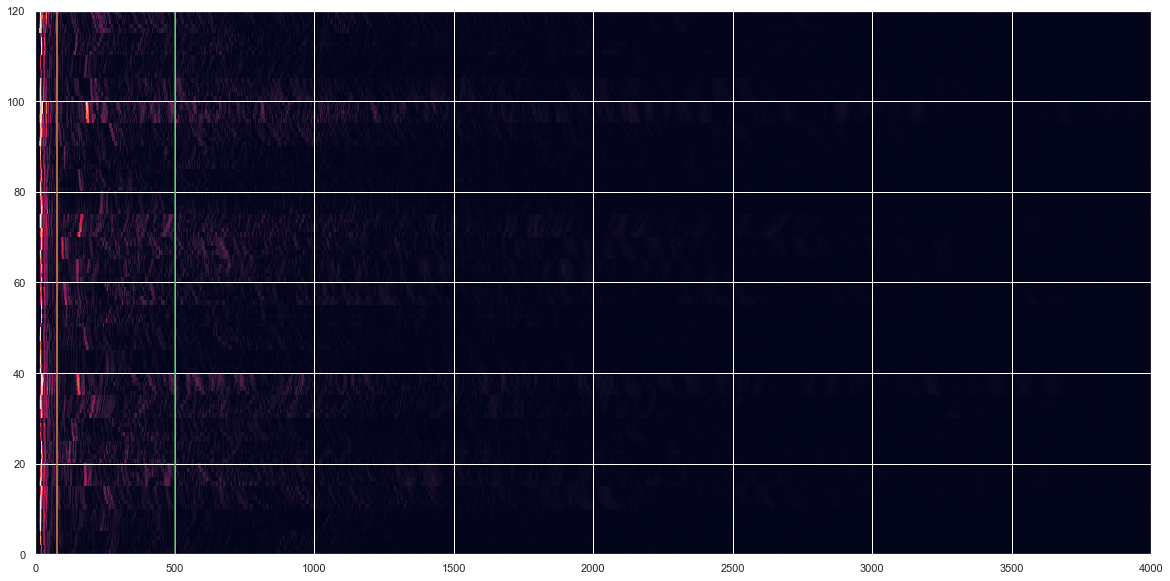

direct2earlys 4.256876557815615 +- 2.653378873249268
direct2revers 2.4846972512297603 +- 2.724544064739779


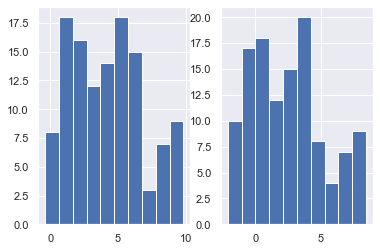

1 010000
( 0, 0)       5.04 	 2.35
( 1, 0)       5.82 	 3.21
( 2, 0)       5.84 	 3.42
( 3, 0)       5.72 	 3.43
( 4, 0)       5.91 	 3.74
( 5, 0)       2.88 	 1.11
( 6, 0)       2.72 	 0.95
( 7, 0)       2.09 	 -0.10
( 8, 0)       2.43 	 0.44
( 9, 0)       2.04 	 -0.33
(10, 0)       3.18 	 0.87
(11, 0)       3.05 	 0.88
(12, 0)       3.06 	 0.91
(13, 0)       1.94 	 -0.11
(14, 0)       1.58 	 -0.14
(15, 0)       1.48 	 -0.98
(16, 0)       1.79 	 -0.63
(17, 0)       1.63 	 -1.14
(18, 0)       1.68 	 -1.31
(19, 0)       1.59 	 -1.48
(20, 0)       1.00 	 -2.30
(21, 0)       0.96 	 -2.49
(22, 0)       1.50 	 -2.19
(23, 0)       1.69 	 -1.99
(24, 0)       2.10 	 -1.50
(25, 0)       2.94 	 0.89
(26, 0)       3.28 	 1.04
(27, 0)       3.35 	 1.09
(28, 0)       3.59 	 1.32
(29, 0)       4.53 	 2.30
( 0, 1)       0.77 	 -0.34
( 1, 1)       0.68 	 -0.50
( 2, 1)       1.53 	 0.27
( 3, 1)       1.25 	 -0.15
( 4, 1)       1.82 	 0.13
( 5, 1)       4.99 	 3.52
( 6, 1)       5.33 	 4.02
( 7, 1)     

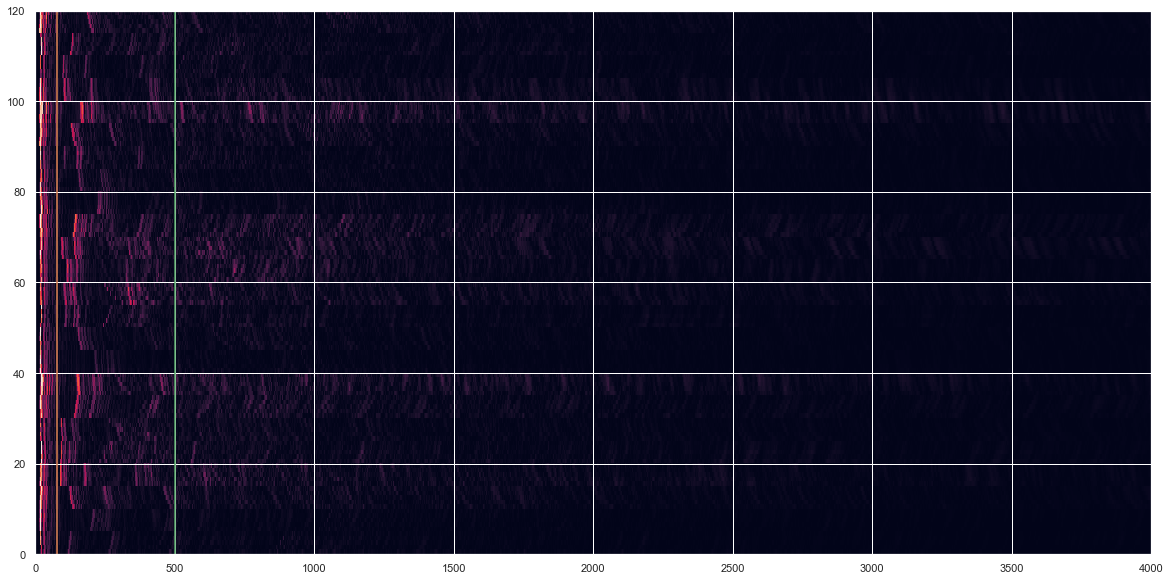

direct2earlys 2.544296200811509 +- 2.979569957702025
direct2revers 0.38159698603122166 +- 3.100447594577064


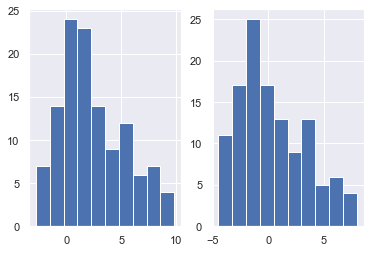

2 011000
( 0, 0)       2.29 	 -0.07
( 1, 0)       2.75 	 0.23
( 2, 0)       3.48 	 0.75
( 3, 0)       4.43 	 1.81
( 4, 0)       6.06 	 2.71
( 5, 0)       1.66 	 -0.65
( 6, 0)       1.53 	 -1.04
( 7, 0)       0.79 	 -1.79
( 8, 0)       2.19 	 -0.71
( 9, 0)      -0.03 	 -2.34
(10, 0)       2.13 	 -0.49
(11, 0)       2.18 	 -0.12
(12, 0)       2.32 	 -0.03
(13, 0)       1.91 	 -0.69
(14, 0)       0.77 	 -1.16
(15, 0)       1.04 	 -1.80
(16, 0)       1.23 	 -1.81
(17, 0)       1.01 	 -2.50
(18, 0)       1.15 	 -2.51
(19, 0)       1.17 	 -2.72
(20, 0)       0.82 	 -2.78
(21, 0)       0.79 	 -2.84
(22, 0)       1.32 	 -2.36
(23, 0)       1.54 	 -2.31
(24, 0)       2.15 	 -2.26
(25, 0)       2.90 	 0.45
(26, 0)       3.25 	 0.50
(27, 0)       3.33 	 0.35
(28, 0)       3.57 	 0.61
(29, 0)       4.51 	 1.43
( 0, 1)      -0.59 	 -2.06
( 1, 1)      -0.26 	 -1.94
( 2, 1)       1.45 	 -0.57
( 3, 1)      -0.02 	 -1.74
( 4, 1)      -1.13 	 -2.58
( 5, 1)       3.22 	 1.33
( 6, 1)       4.09 	 2.07
( 7

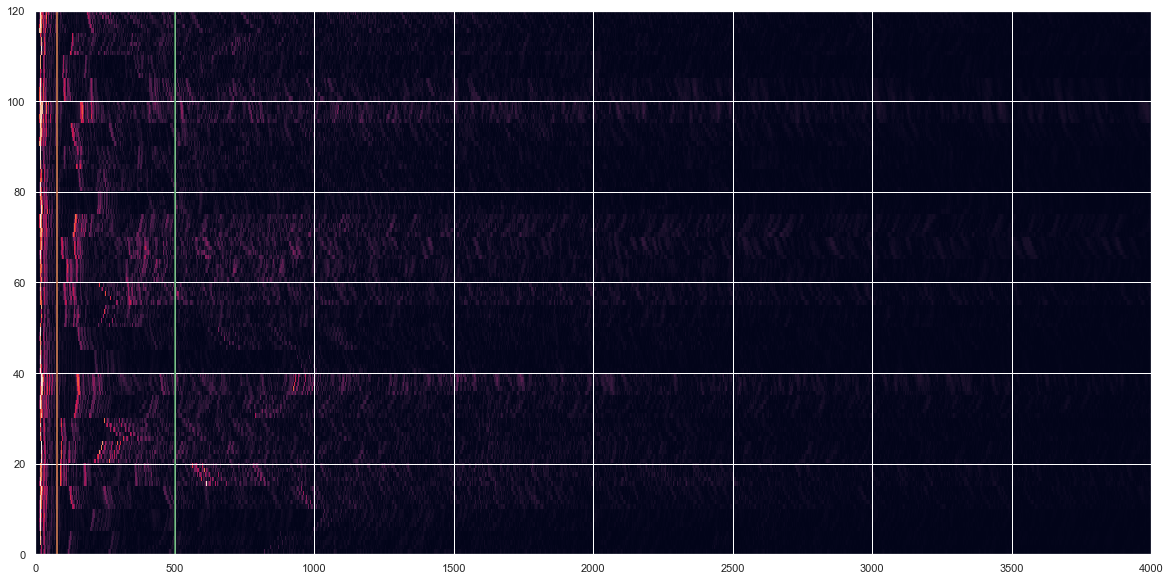

direct2earlys 1.8238218676136815 +- 3.4456657184933355
direct2revers -1.1567470542866283 +- 3.197137707772023


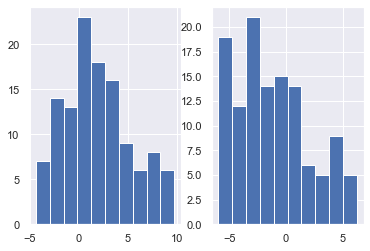

3 011100
( 0, 0)       2.92 	 -1.23
( 1, 0)       3.17 	 -1.03
( 2, 0)       3.73 	 -0.66
( 3, 0)       4.48 	 0.25
( 4, 0)       5.89 	 1.41
( 5, 0)       1.40 	 -2.43
( 6, 0)       1.32 	 -2.91
( 7, 0)       0.75 	 -3.48
( 8, 0)       2.00 	 -2.70
( 9, 0)      -0.25 	 -3.84
(10, 0)       2.02 	 -2.37
(11, 0)       2.17 	 -2.01
(12, 0)       1.85 	 -1.75
(13, 0)       1.56 	 -2.10
(14, 0)       0.83 	 -2.33
(15, 0)       1.13 	 -4.13
(16, 0)       1.22 	 -4.18
(17, 0)       0.85 	 -4.38
(18, 0)       1.12 	 -4.58
(19, 0)       1.19 	 -4.31
(20, 0)       0.91 	 -4.78
(21, 0)       0.90 	 -4.82
(22, 0)       1.41 	 -4.51
(23, 0)       1.55 	 -4.19
(24, 0)       2.02 	 -4.16
(25, 0)       2.90 	 -1.11
(26, 0)       3.26 	 -0.84
(27, 0)       3.33 	 -0.72
(28, 0)       3.60 	 -0.32
(29, 0)       4.53 	 0.68
( 0, 1)      -0.43 	 -2.24
( 1, 1)       0.02 	 -2.02
( 2, 1)       1.54 	 -0.93
( 3, 1)       0.09 	 -2.17
( 4, 1)      -1.37 	 -3.33
( 5, 1)       2.97 	 0.63
( 6, 1)       3.83 	 1.

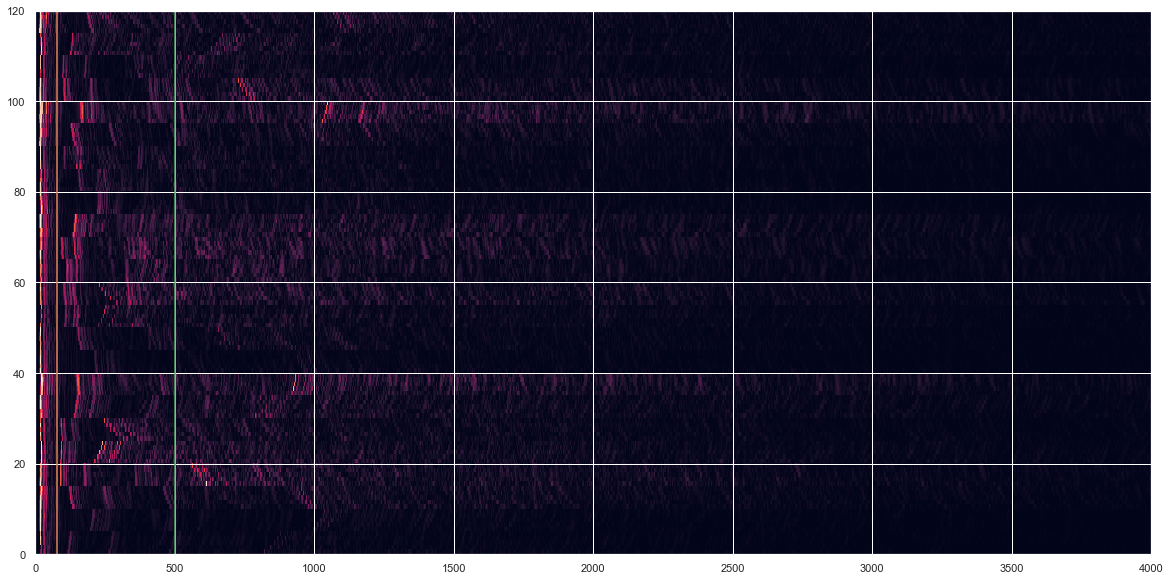

direct2earlys 1.729446133534398 +- 3.41664274268902
direct2revers -2.1095893474146594 +- 3.307247326044118


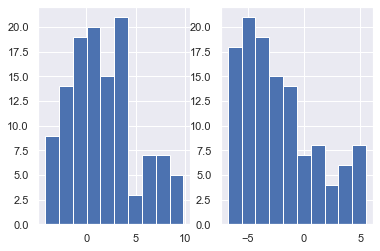

4 011110
( 0, 0)       2.93 	 -1.68
( 1, 0)       3.17 	 -1.63
( 2, 0)       3.73 	 -1.43
( 3, 0)       4.48 	 -0.77
( 4, 0)       5.89 	 0.59
( 5, 0)       1.41 	 -3.24
( 6, 0)       1.32 	 -3.85
( 7, 0)       0.74 	 -4.32
( 8, 0)       1.99 	 -3.37
( 9, 0)      -0.25 	 -4.64
(10, 0)       1.97 	 -3.10
(11, 0)       2.20 	 -2.85
(12, 0)       1.83 	 -2.94
(13, 0)       1.58 	 -2.93
(14, 0)       0.84 	 -3.33
(15, 0)       1.15 	 -5.26
(16, 0)       1.32 	 -5.11
(17, 0)       0.95 	 -5.35
(18, 0)       1.07 	 -5.52
(19, 0)       1.20 	 -5.48
(20, 0)       0.93 	 -6.08
(21, 0)       0.90 	 -6.10
(22, 0)       1.40 	 -6.01
(23, 0)       1.56 	 -6.08
(24, 0)       2.02 	 -5.21
(25, 0)       2.93 	 -2.31
(26, 0)       3.28 	 -2.10
(27, 0)       3.36 	 -2.02
(28, 0)       3.62 	 -1.38
(29, 0)       4.55 	 -0.70
( 0, 1)      -0.42 	 -3.03
( 1, 1)       0.01 	 -2.99
( 2, 1)       1.55 	 -2.18
( 3, 1)       0.11 	 -3.09
( 4, 1)      -1.37 	 -4.31
( 5, 1)       2.96 	 0.18
( 6, 1)       3.82 	 

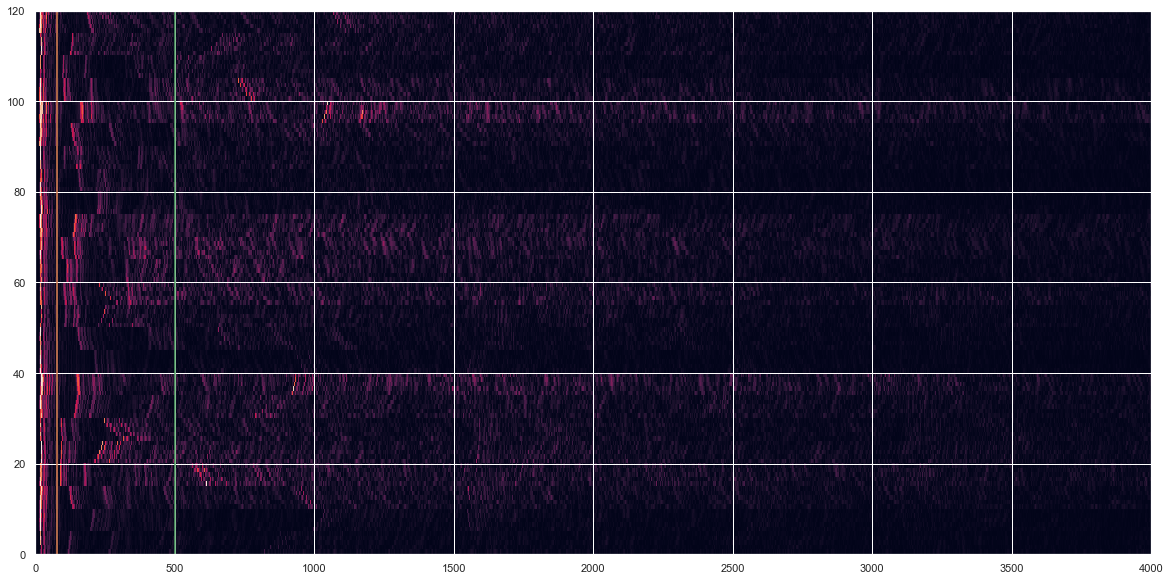

direct2earlys 1.6152490148336345 +- 3.3741603453138707
direct2revers -3.221444020428983 +- 3.297562660314831


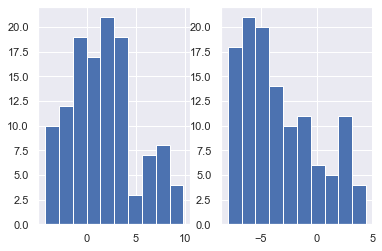

5 011111
( 0, 0)       2.56 	 -3.25
( 1, 0)       2.81 	 -3.18
( 2, 0)       2.95 	 -3.00
( 3, 0)       3.92 	 -2.45
( 4, 0)       5.50 	 -1.33
( 5, 0)       0.75 	 -4.73
( 6, 0)       0.58 	 -5.33
( 7, 0)       0.46 	 -5.67
( 8, 0)       2.05 	 -4.70
( 9, 0)      -0.61 	 -5.75
(10, 0)       2.09 	 -3.91
(11, 0)       2.39 	 -3.68
(12, 0)       2.02 	 -3.77
(13, 0)       1.51 	 -4.22
(14, 0)       0.67 	 -4.05
(15, 0)       1.38 	 -6.27
(16, 0)       1.51 	 -6.13
(17, 0)       0.96 	 -6.29
(18, 0)       0.81 	 -6.51
(19, 0)       0.42 	 -6.95
(20, 0)       0.64 	 -7.66
(21, 0)       0.57 	 -7.42
(22, 0)       0.83 	 -7.44
(23, 0)       0.79 	 -7.13
(24, 0)       1.05 	 -6.37
(25, 0)       2.50 	 -3.76
(26, 0)       2.84 	 -3.28
(27, 0)       2.95 	 -3.16
(28, 0)       3.24 	 -2.63
(29, 0)       4.22 	 -2.06
( 0, 1)      -0.39 	 -5.48
( 1, 1)       0.04 	 -5.51
( 2, 1)       1.57 	 -5.09
( 3, 1)       0.10 	 -5.47
( 4, 1)      -1.74 	 -6.37
( 5, 1)       2.95 	 -2.15
( 6, 1)       3.81 

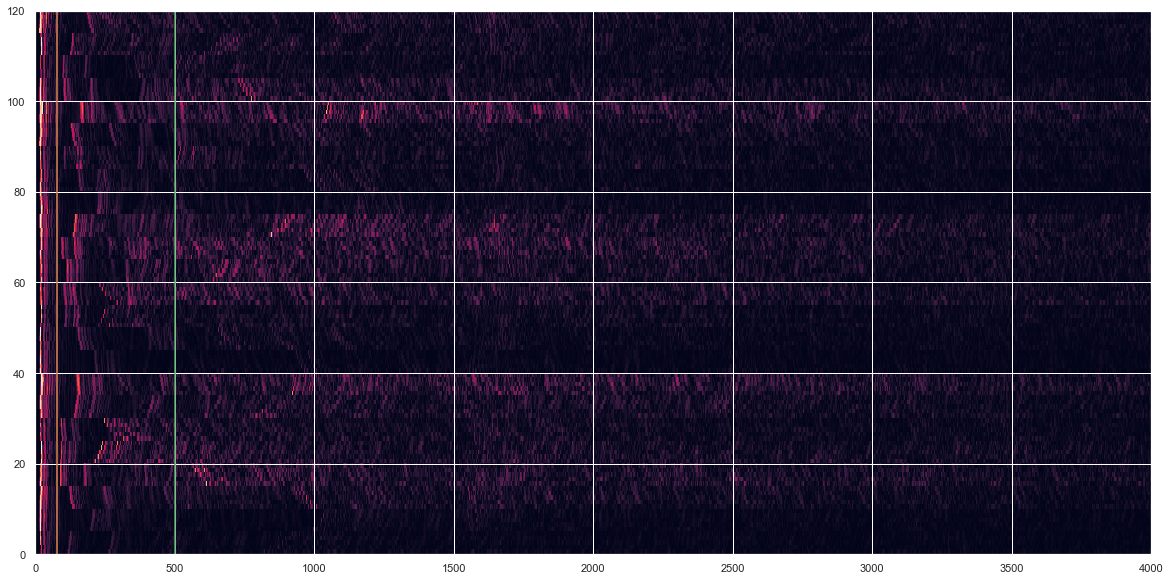

direct2earlys 1.483068335455704 +- 3.3830136717328254
direct2revers -4.608674009601413 +- 3.3573806302305953


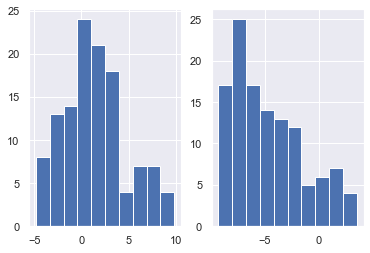

6 001000
( 0, 0)       2.98 	 1.19
( 1, 0)       3.68 	 1.87
( 2, 0)       3.00 	 1.41
( 3, 0)       4.07 	 2.36
( 4, 0)       5.07 	 3.11
( 5, 0)       3.59 	 1.24
( 6, 0)       3.27 	 1.16
( 7, 0)       2.76 	 0.56
( 8, 0)       3.01 	 0.66
( 9, 0)       0.49 	 -1.03
(10, 0)       5.26 	 2.85
(11, 0)       4.84 	 2.91
(12, 0)       5.11 	 3.25
(13, 0)       4.36 	 2.49
(14, 0)       4.43 	 2.37
(15, 0)       3.37 	 0.85
(16, 0)       3.40 	 0.83
(17, 0)       3.22 	 0.40
(18, 0)       3.85 	 0.77
(19, 0)       3.49 	 0.00
(20, 0)      -0.36 	 -2.47
(21, 0)      -0.38 	 -2.44
(22, 0)       0.23 	 -1.91
(23, 0)       0.47 	 -1.68
(24, 0)       0.68 	 -1.51
(25, 0)       5.95 	 2.84
(26, 0)       6.05 	 2.88
(27, 0)       6.03 	 2.84
(28, 0)       5.82 	 2.74
(29, 0)       6.73 	 3.82
( 0, 1)       3.54 	 1.56
( 1, 1)       2.92 	 1.25
( 2, 1)       3.26 	 1.50
( 3, 1)       4.46 	 2.22
( 4, 1)       3.37 	 1.38
( 5, 1)       5.11 	 3.43
( 6, 1)       4.38 	 3.21
( 7, 1)       3.93 	 2.

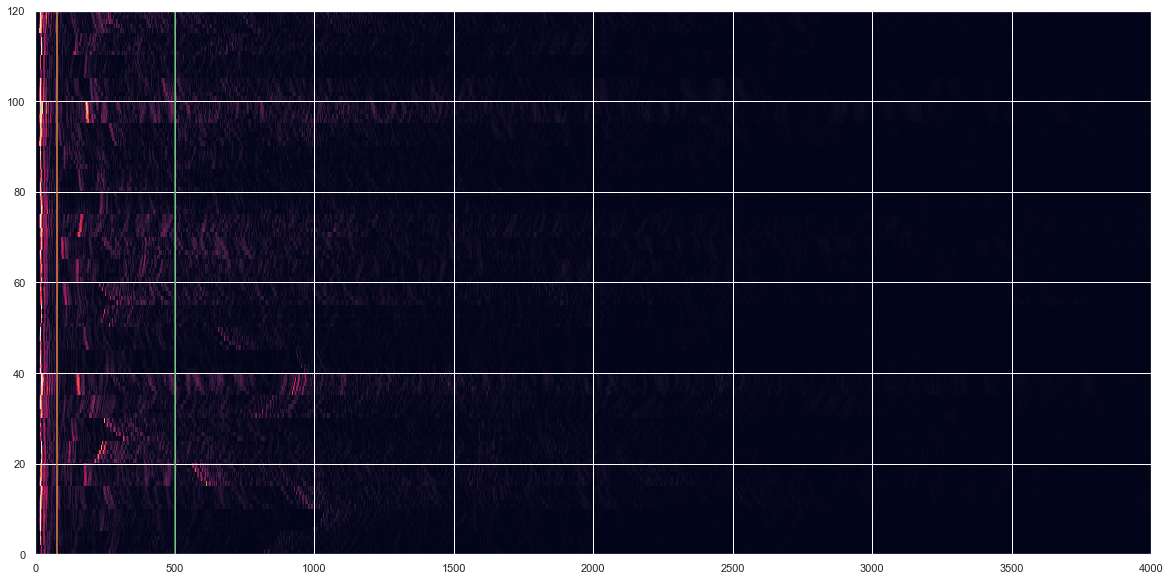

direct2earlys 3.326248463880226 +- 3.1043289436743575
direct2revers 1.0172511789911627 +- 2.8710879842955683


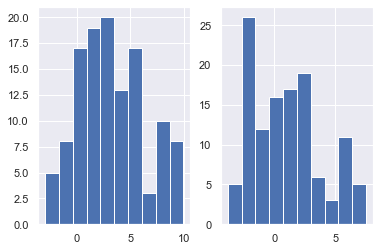

7 000100
( 0, 0)       4.04 	 1.52
( 1, 0)       4.94 	 2.32
( 2, 0)       4.55 	 2.20
( 3, 0)       4.86 	 2.66
( 4, 0)       4.82 	 2.84
( 5, 0)       5.51 	 1.47
( 6, 0)       5.08 	 1.34
( 7, 0)       4.31 	 0.57
( 8, 0)       4.46 	 0.77
( 9, 0)       3.26 	 0.02
(10, 0)       6.72 	 1.94
(11, 0)       6.37 	 2.08
(12, 0)       5.64 	 2.20
(13, 0)       5.00 	 2.09
(14, 0)       4.58 	 1.82
(15, 0)       4.14 	 -1.02
(16, 0)       4.50 	 -0.94
(17, 0)       4.56 	 -1.12
(18, 0)       5.42 	 -0.64
(19, 0)       4.62 	 -0.98
(20, 0)      -0.36 	 -3.36
(21, 0)      -0.31 	 -3.24
(22, 0)       0.33 	 -2.83
(23, 0)       0.64 	 -2.66
(24, 0)       0.83 	 -2.49
(25, 0)       5.99 	 1.76
(26, 0)       6.14 	 2.07
(27, 0)       6.13 	 2.02
(28, 0)       5.76 	 2.04
(29, 0)       6.74 	 3.59
( 0, 1)       5.01 	 3.00
( 1, 1)       4.93 	 3.12
( 2, 1)       5.35 	 3.42
( 3, 1)       5.87 	 3.39
( 4, 1)       6.80 	 4.09
( 5, 1)       5.80 	 4.32
( 6, 1)       6.20 	 4.79
( 7, 1)       5.61 

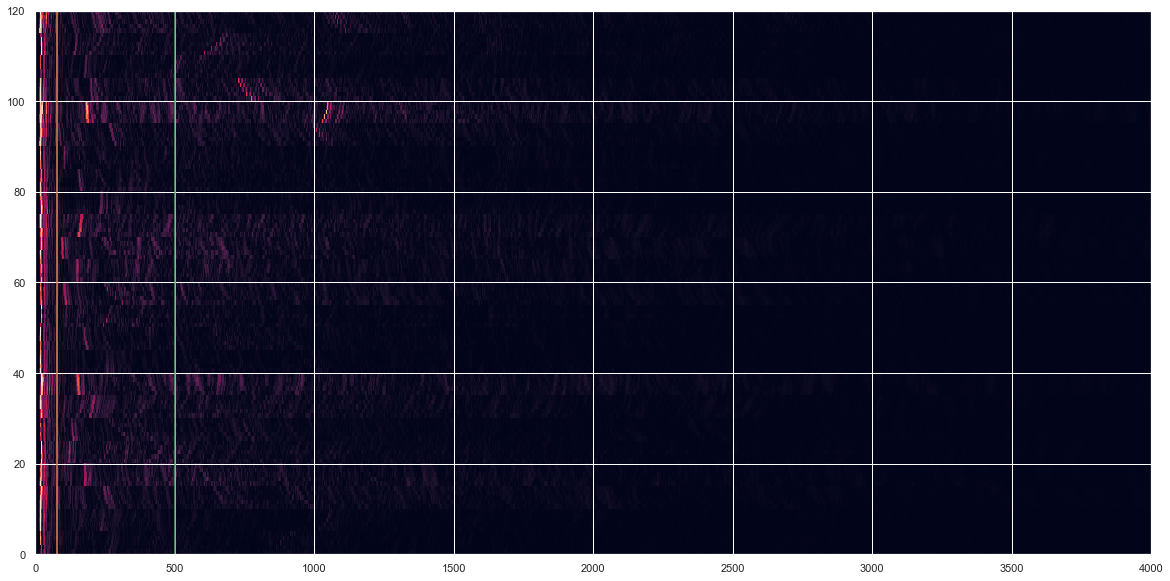

direct2earlys 4.181690041387616 +- 2.6557529179516868
direct2revers 1.7631643851675654 +- 2.857507755757662


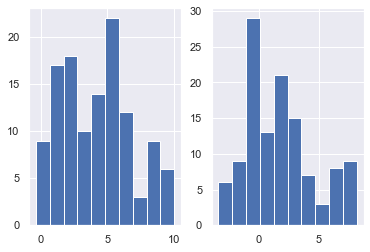

8 000010
( 0, 0)       3.79 	 2.20
( 1, 0)       4.43 	 2.74
( 2, 0)       4.53 	 2.93
( 3, 0)       5.02 	 3.55
( 4, 0)       4.44 	 3.11
( 5, 0)       5.68 	 3.13
( 6, 0)       5.28 	 2.94
( 7, 0)       4.43 	 2.25
( 8, 0)       4.62 	 2.59
( 9, 0)       3.27 	 1.32
(10, 0)       6.73 	 3.96
(11, 0)       6.36 	 3.75
(12, 0)       6.23 	 3.60
(13, 0)       5.39 	 2.83
(14, 0)       5.08 	 2.62
(15, 0)       4.20 	 0.66
(16, 0)       4.52 	 0.70
(17, 0)       4.46 	 0.86
(18, 0)       5.33 	 1.21
(19, 0)       4.67 	 0.31
(20, 0)      -0.48 	 -2.78
(21, 0)      -0.38 	 -2.73
(22, 0)       0.26 	 -1.94
(23, 0)       0.56 	 -1.98
(24, 0)       0.75 	 -1.67
(25, 0)       5.97 	 2.76
(26, 0)       6.14 	 2.76
(27, 0)       6.13 	 2.83
(28, 0)       5.76 	 2.63
(29, 0)       6.60 	 3.82
( 0, 1)       5.01 	 2.60
( 1, 1)       4.81 	 2.62
( 2, 1)       5.45 	 3.25
( 3, 1)       6.66 	 3.47
( 4, 1)       7.79 	 4.28
( 5, 1)       6.01 	 4.73
( 6, 1)       6.44 	 5.24
( 7, 1)       5.76 	 4.6

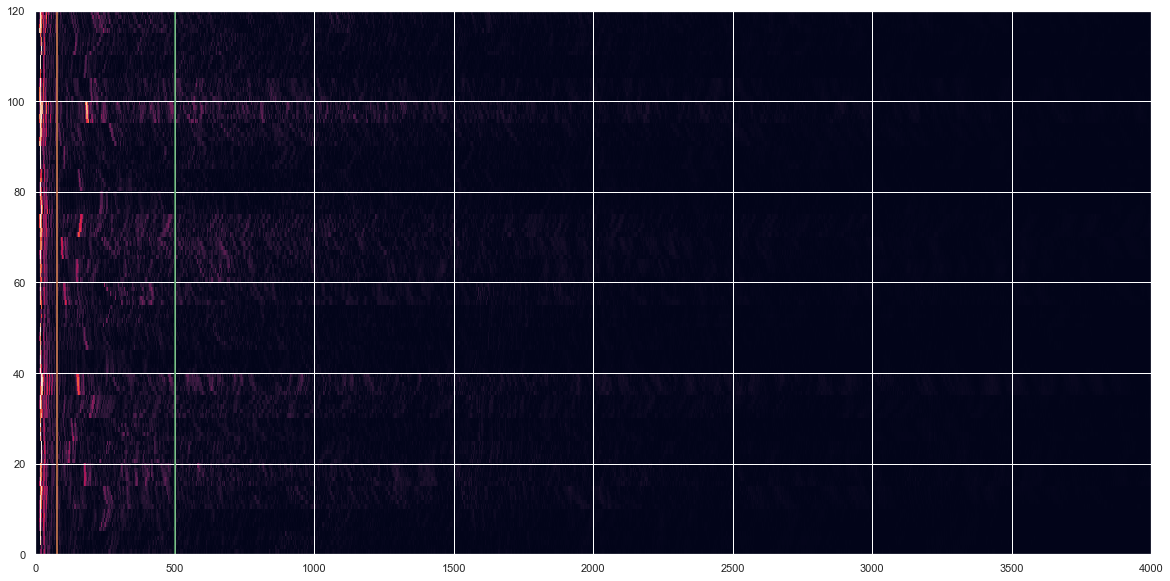

direct2earlys 4.037105840942462 +- 2.563525781958349
direct2revers 1.9840466045927074 +- 2.6898421889057786


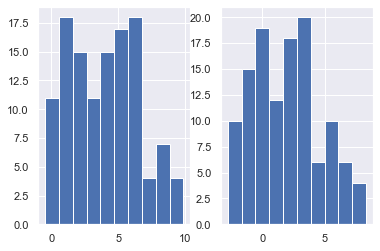

9 000001
( 0, 0)       3.27 	 1.82
( 1, 0)       4.41 	 2.73
( 2, 0)       3.68 	 2.24
( 3, 0)       4.47 	 3.07
( 4, 0)       5.00 	 3.47
( 5, 0)       5.27 	 3.01
( 6, 0)       4.93 	 2.74
( 7, 0)       4.47 	 2.34
( 8, 0)       4.71 	 2.60
( 9, 0)       3.43 	 1.47
(10, 0)       6.18 	 3.63
(11, 0)       6.09 	 3.84
(12, 0)       5.59 	 3.71
(13, 0)       4.69 	 2.73
(14, 0)       4.86 	 2.95
(15, 0)       3.88 	 1.02
(16, 0)       3.73 	 1.25
(17, 0)       3.19 	 0.52
(18, 0)       3.80 	 0.80
(19, 0)       3.41 	 0.48
(20, 0)      -0.72 	 -2.71
(21, 0)      -0.72 	 -2.62
(22, 0)      -0.33 	 -2.16
(23, 0)      -0.19 	 -2.10
(24, 0)       0.39 	 -1.91
(25, 0)       5.29 	 2.20
(26, 0)       5.31 	 2.17
(27, 0)       5.07 	 2.16
(28, 0)       4.91 	 2.36
(29, 0)       6.02 	 3.77
here
( 0, 2)       0.72 	 -0.67
( 1, 2)       0.53 	 -0.85
( 2, 2)       1.15 	 -0.40
( 3, 2)       0.51 	 -1.16
( 4, 2)       0.28 	 -1.41
( 5, 2)       3.77 	 2.30
( 6, 2)       3.77 	 2.24
( 7, 2)       

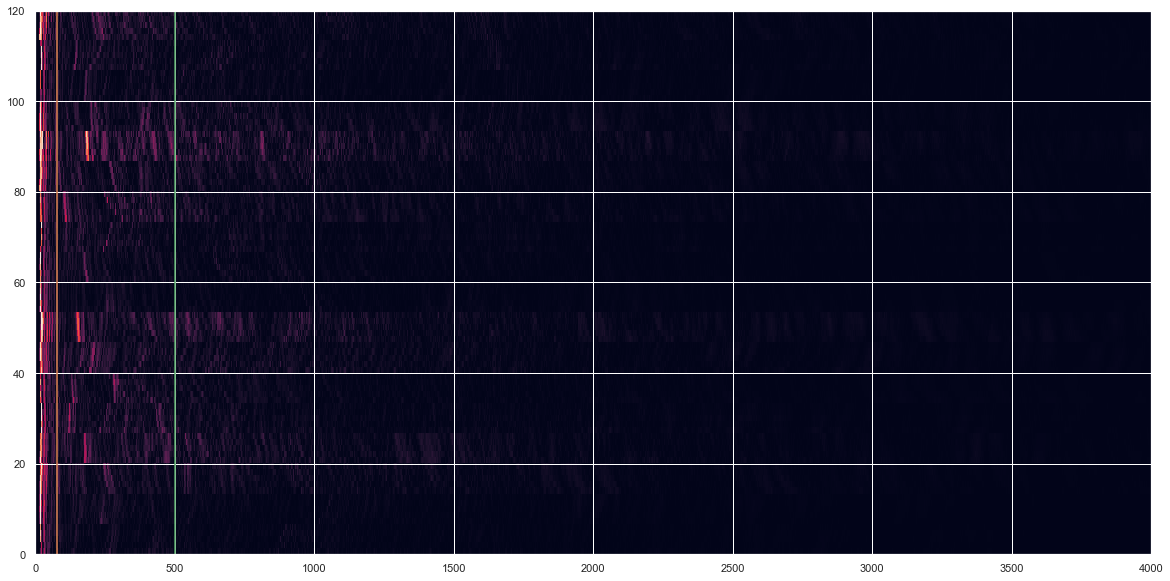

direct2earlys 4.022992970545707 +- 2.763735458163304
direct2revers 2.090358228155507 +- 2.7647035225528023


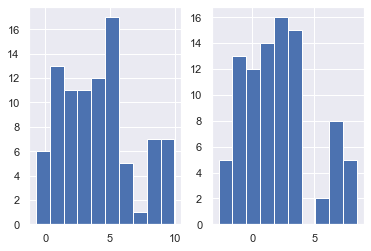

10 020002
( 0, 0)       4.26 	 1.56
( 1, 0)       5.09 	 2.22
( 2, 0)       4.38 	 1.77
( 3, 0)       4.58 	 2.27
( 4, 0)       5.33 	 3.01
( 5, 0)       2.93 	 0.86
( 6, 0)       3.24 	 1.20
( 7, 0)       2.73 	 0.52
( 8, 0)       2.63 	 0.57
( 9, 0)       1.88 	 -0.50
(10, 0)       4.30 	 2.36
(11, 0)       5.00 	 3.00
(12, 0)       5.46 	 3.52
(13, 0)       4.61 	 2.50
(14, 0)       2.63 	 1.17
(15, 0)       3.27 	 -0.15
(16, 0)       2.50 	 -0.39
(17, 0)       1.56 	 -1.17
(18, 0)       1.50 	 -0.89
(19, 0)       1.40 	 -0.96
(20, 0)       0.35 	 -2.74
(21, 0)       0.27 	 -2.77
(22, 0)       0.54 	 -2.36
(23, 0)       0.53 	 -2.45
(24, 0)       0.70 	 -2.07
(25, 0)       2.82 	 0.77
(26, 0)       3.15 	 0.96
(27, 0)       3.38 	 1.10
(28, 0)       3.81 	 1.46
(29, 0)       4.44 	 2.10
( 0, 1)      -0.23 	 -3.35
( 1, 1)      -0.23 	 -3.29
( 2, 1)       1.10 	 -2.16
( 3, 1)       1.82 	 -1.74
( 4, 1)       1.79 	 -0.91
( 5, 1)       4.89 	 1.83
( 6, 1)       4.96 	 2.32
( 7, 1)     

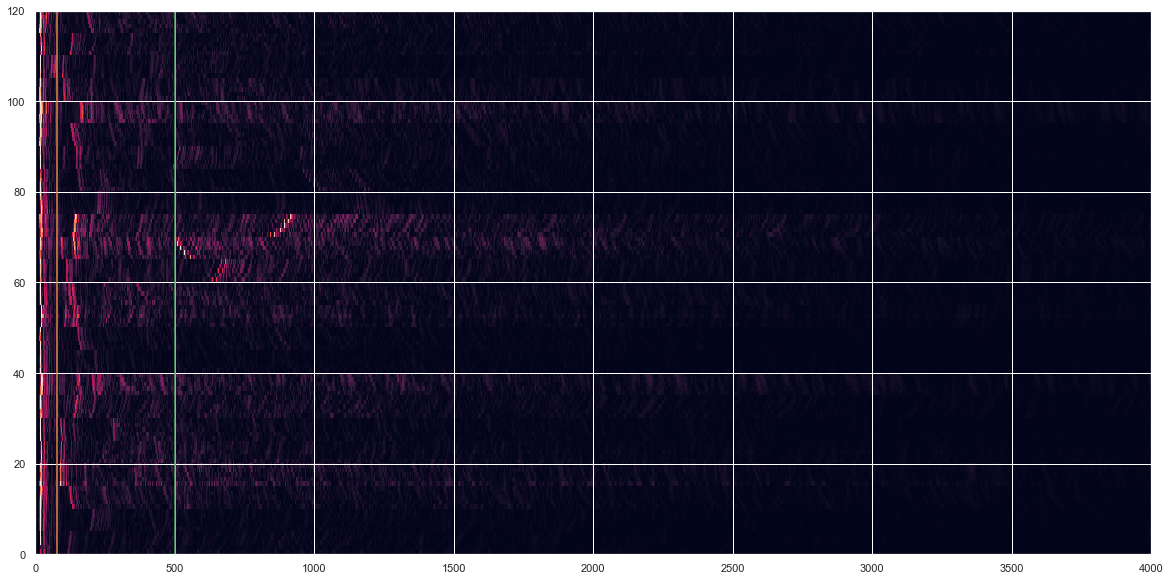

direct2earlys 2.192269499521895 +- 3.249003065215981
direct2revers -0.46208962830554107 +- 3.6290526126709204


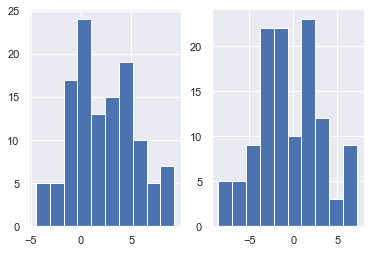

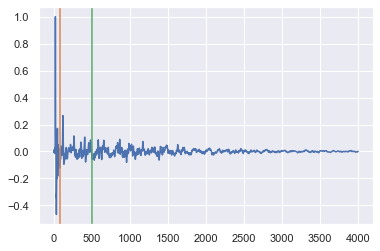

In [201]:
n0 = 20
er = 80
lr = 500
L = 4000

df = pd.DataFrame()

c = 0
for r in range(R):
    curr_rirs = []
    direct2earlys = []
    direct2revers = []
    
    room = constants['datasets'][r]
    
    print(r, room)
    
    for j in range(J):
        
        if j == 1 and r == 9:
            print('here')
            continue
        
        for i in range(I):
            
            dp = toa_pck[0,i,j]
            nd = int(dp*Fs) + constants['recording_offset']
            
            # center the RIR
            h = rirs[nd-n0:nd-n0+L, i, j, r]
            h = h / np.max(np.abs(h))
            curr_rirs.append(h)
            
            # compute parameter
            direct = h[:er]**2
            early = h[er:lr]**2
            reverb = h[er:L]**2
            
            df.at[c,'mic'] = i
            df.at[c,'src'] = 'src #%d' % j
            df.at[c,'room'] = room
            df.at[c,'direct'] = direct.sum()
            df.at[c,'early'] = early.sum()
            df.at[c,'reverb'] = reverb.sum()

#             plt.figure(figsize=(20,5))
#             plt.plot(h**2)
#             plt.axvline(er)
#             plt.axvline(lr)
#             plt.axvline(L)
#             plt.xlim([0,L])
#             plt.show()
            
            direct2early = 10*np.log10(direct.sum()/early.sum())
            direct2reverb = 10*np.log10(direct.sum()/reverb.sum())
        
            direct2earlys.append(direct2early)
            direct2revers.append(direct2reverb)
            
            print('(%2d,%2d) %10.2f \t %1.2f' % (i, j, direct2early, direct2reverb))
            
            df.at[c,'direct2early'] = direct2early
            df.at[c,'direct2reverb'] = direct2reverb

            c += 1
                
    curr_rirs = np.array(curr_rirs)

    print('Room', r, room)
    
    
    plt.figure(figsize=(20,10))
    plt.imshow(np.abs(curr_rirs), extent=[0, L, 0, I*J], aspect='auto')
    plt.axvline(er, color='C1')
    plt.axvline(lr, color='C2')
    plt.show()
    
    print('direct2earlys', np.mean(direct2earlys), '+-', np.std(direct2earlys))
    print('direct2revers', np.mean(direct2revers), '+-', np.std(direct2revers))
    
    plt.subplot(121)
    plt.hist(direct2earlys)
    plt.subplot(122)
    plt.hist(direct2revers)
    plt.show()

plt.plot(h)
plt.axvline(er, color='C1')
plt.axvline(lr, color='C2')

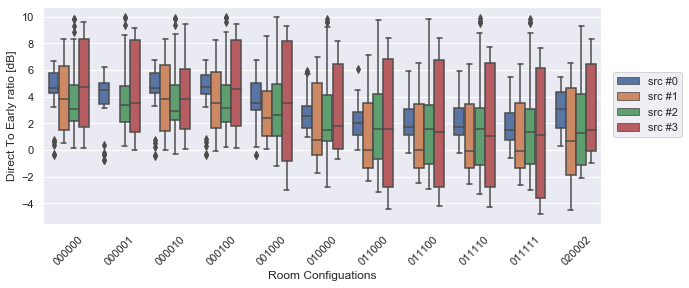

In [202]:
sns.set()

plt.figure(figsize=[10,4])
plt.title('Direct To Earl')
ax = sns.boxplot(x='room', y='direct2early', hue='src', data = df)
plt.ylabel('Direct To Early ratio [dB]')
plt.xlabel('Room Configuations')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.02, .7), loc=2, ncol=1, borderaxespad=0.)
plt.show()


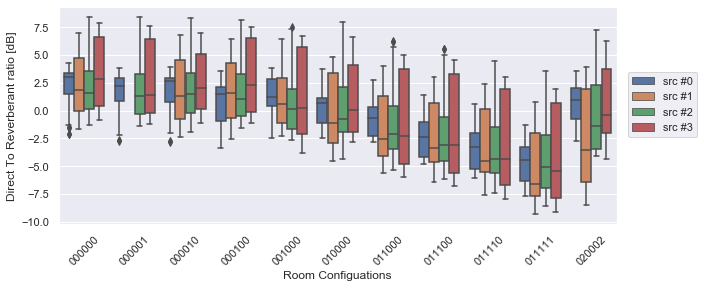

In [203]:
plt.figure(figsize=[10,4])
ax = sns.boxplot(x='room', y='direct2reverb', hue='src', data = df)
plt.ylabel('Direct To Reverberant ratio [dB]')
plt.xlabel('Room Configuations')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.02, .7), loc=2, ncol=1, borderaxespad=0.)
plt.show()
